# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>
### Exercise 01.1

#### Part 1

This excercise consists in testing a Pseudo-Random Number generator through three different methods. 
The first one consists in evaluating the mean of the numbersgenerated, which one would expect to be $\frac{1}{2}$, since the expected value is E = $\int_{0}^{1} x dx = [\frac{x^2}{2}]^1 _0 = \frac{1}{2}$. The uncertainty is computed through the blocks methods, which divides the numbers generated (in this case $10^4$) in several blocks (in this case $10^2$) and then finding the standard deviation by 
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
where $A_i$ is the mean on the i-th block, $A^2_i$ is its square and $N$ is the number of blocks.

In the graph is plotted the mean minus the expected value of $\frac{1}{2}$ as a function of the blocks used to evaluate it. The results are as expected within the uncertainty.

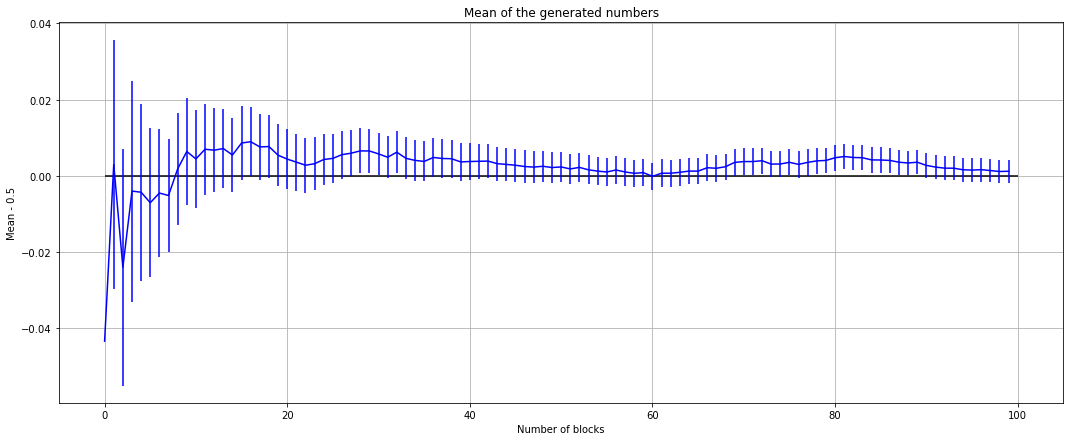

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x,y,err=np.loadtxt("Media.dat", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(18, 7))

plt.hlines(0, 0, 100, color = 'black')
plt.errorbar(x,y-0.5,yerr=err, color = 'b')
plt.xlabel('Number of blocks')
plt.ylabel('Mean - 0.5')
plt.title("Mean of the generated numbers")
plt.grid(True)
plt.show()

#### Part 2

The second method used to analyze the Pseudo-Random Generator was the evaluation of the variance of the generated numbers, which is expected to be $\sigma^2 = \int_{0}^{1} (x - \frac{1}{2}) dx = \frac{1}{12}$. Below is plotted the variance minus the expected value of $\frac{1}{12}$, which again results to be in agreement with the prediction within the uncertainty. The uncertainty was found using the block method as before

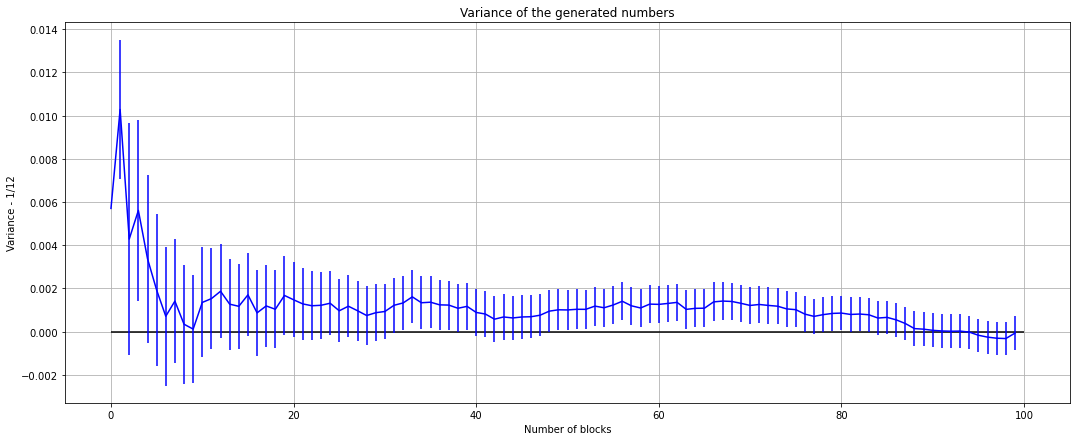

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x,y,err=np.loadtxt("Varianza.dat", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(18, 7))

plt.hlines(0, 0, 100, color = 'black')
plt.errorbar(x,y-1/12,yerr=err, color = 'b')
plt.xlabel('Number of blocks')
plt.ylabel('Variance - 1/12')
plt.title("Variance of the generated numbers")
plt.grid(True)
plt.show()

#### Part 3

Lastly the $\chi ^2$ test was performed. It is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The expecte value of $\chi ^2$ is 100, with a higher value indicating that the numbers aren't generated randomly. The $\chi ^2$ plotted are evaluated using a different set of $10^4$ numbers each time divided into 100 uniform bins between $[0,1)$. The results show that on average $\chi ^2 \approx 100$, with significant spikes, therefore one cannot exclude nor confirm that the generator isn't random.

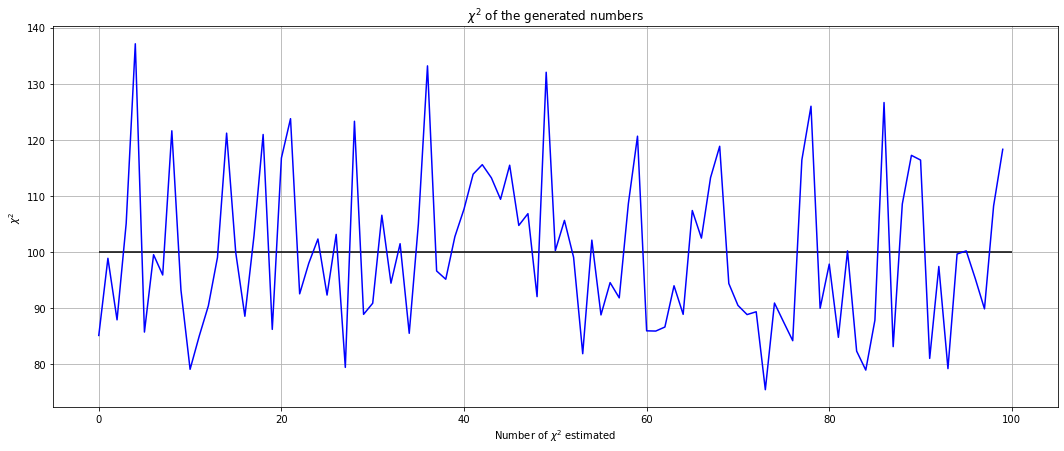

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x,y=np.loadtxt("Chi2.dat", usecols=(0, 1), unpack=True)

fig=plt.figure(figsize=(18, 7))

plt.hlines(100, 0, 100, color = 'black')
plt.plot(x,y, color = 'blue')
plt.xlabel('Number of $\chi^2$ estimated')
plt.ylabel('$\chi^2$')
plt.title("$\chi^2$ of the generated numbers")
plt.grid(True)
plt.show()

### Exercise 01.2

In this exercise we check the Central Limit Theorem using the Pseudo-Random Generator we tested in exercise 01.1. First we add two probability distributions to the generator, an exponential distribution and a Lorentz distribution, by inverting their cumulative distribution,. Their mathematical expressions are respectively 

$$p(x) = \lambda exp(-\lambda x) ,  x\in[0;+\infty] $$ 

$$p(x) = \frac{1}{\pi} \frac{\Gamma}{(x - \mu)^2+\Gamma ^2} ,  x\in[-\infty;+\infty] $$


The cumulative of the exponential is $$F_x(x)=\int_0^x \lambda exp(-\lambda x) = 1-exp(-\lambda x)$$ 

from which we can sample $x$ with an exponential distribution by inverting it: 
$$x=-\frac{1}{\lambda}\log(1-y)$$


Similarly, for the Lorentzian we obtain 
$$x=\Gamma \tan[\pi(y-\frac{1}{2})]+\mu$$


Then we plot $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ with N = 1, 2, 10, 100 and $x_i$ being a radom variable sampled first uniformly in $[0,6)$, then exponentially with $\lambda = 1$ and lastly using a Lorentzian choosing $\mu = 0$ and $\Gamma = 1$.

The first two samplings lead to a Gaussian distribution, because the variance of the probability distributions used are finite; the Lorentzian converges to a Cauchy distribution and not to a Gaussian distribution because it has infinite variance.


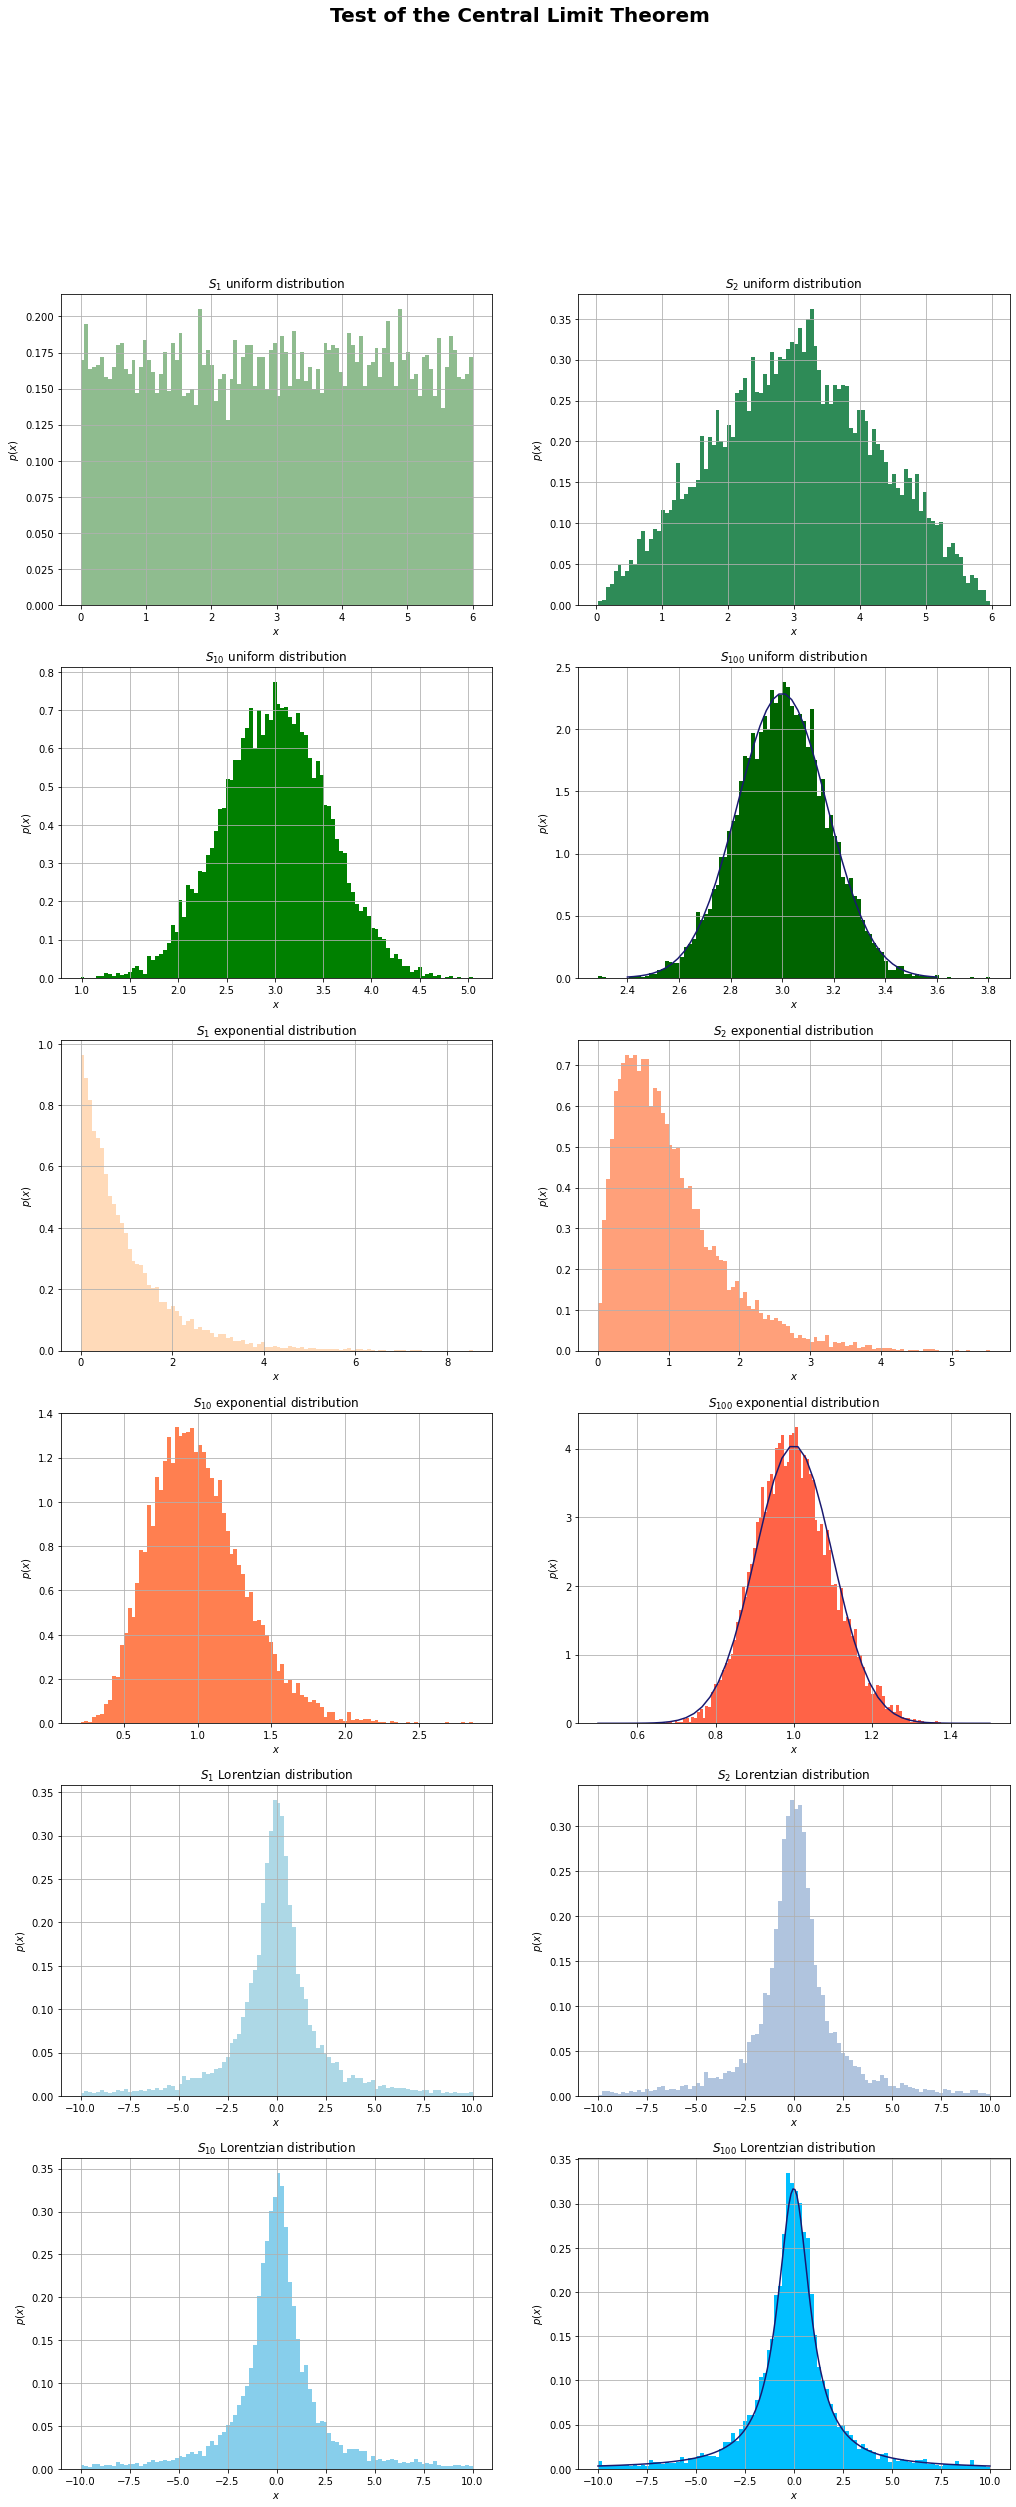

In [14]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm 
from scipy.stats import cauchy

unif1, exp1, lor1=np.loadtxt("Risultati.dat", skiprows=0, max_rows=10000, usecols=(0, 1, 2), unpack=True)
unif2, exp2, lor2=np.loadtxt("Risultati.dat", skiprows=10000, max_rows=10000, usecols=(0, 1, 2), unpack=True)
unif10, exp10, lor10=np.loadtxt("Risultati.dat", skiprows=20000, max_rows=10000, usecols=(0, 1, 2), unpack=True)
unif100, exp100, lor100=np.loadtxt("Risultati.dat", skiprows=30000, max_rows=10000, usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(17, 40))
plt.suptitle("Test of the Central Limit Theorem", fontsize=20, fontweight="bold")

#UNIF 1
plt.subplot(6,2,1)
plt.hist(unif1,100, color='darkseagreen', density=True)
plt.title('$S_1$ uniform distribution',)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#UNIF 2
plt.subplot(6,2,2)
plt.hist(unif2,100, color='seagreen', density=True)
plt.title('$S_2$ uniform distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#UNIF 3
plt.subplot(6,2,3)
plt.hist(unif10,100, color='green', density=True)
plt.title('$S_{10}$ uniform distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#UNIF 4
plt.subplot(6,2,4)
plt.hist(unif100,100, color='darkgreen', density=True)
plt.title('$S_{100}$ uniform distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#fit
parameter_unif=norm.fit(unif100)
x_unif=np.linspace(2.4,3.6)
y_unif=norm.pdf(x_unif, *parameter_unif)
plt.plot(x_unif,y_unif, color = 'midnightblue')

#EXP 1
plt.subplot(6,2,5)
plt.hist(exp1,100, color='peachpuff', density=True)
plt.title('$S_1$ exponential distribution',)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#EXP 2
plt.subplot(6,2,6)
plt.hist(exp2,100, color='lightsalmon', density=True)
plt.title('$S_2$ exponential distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#EXP 3
plt.subplot(6,2,7)
plt.hist(exp10,100, color='coral', density=True)
plt.title('$S_{10}$ exponential distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#EXP 4
plt.subplot(6,2,8)
plt.hist(exp100,100, color='tomato', density=True)
plt.title('$S_{100}$ exponential distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#fit
parameter_exp=norm.fit(exp100)
x_exp=np.linspace(0.5,1.5)
y_exp=norm.pdf(x_exp, *parameter_exp)
plt.plot(x_exp,y_exp, color = 'midnightblue')

#LOR 1
plt.subplot(6,2,9)
plt.hist(lor1,100, range=(-10,10), color='lightblue', density=True)
plt.title('$S_1$ Lorentzian distribution',)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#LOR 2
plt.subplot(6,2,10)
plt.hist(lor2,100, range=(-10,10), color='lightsteelblue', density=True)
plt.title('$S_2$ Lorentzian distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#LOR 3
plt.subplot(6,2,11)
plt.hist(lor10,100, range=(-10,10), color='skyblue', density=True)
plt.title('$S_{10}$ Lorentzian distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#LOR 4
plt.subplot(6,2,12)
plt.hist(lor100,100, range=(-10,10), color='deepskyblue', density=True)
plt.title('$S_{100}$ Lorentzian distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid(True)

#fit
parameter_lor=cauchy.fit(lor100)
x_lor=np.linspace(-10,10,200)
y_lor=cauchy.pdf(x_lor, *parameter_lor)
plt.plot(x_lor,y_lor, color = 'midnightblue')
plt.show()

### Exercise 01.3

This exercise consists in simulating Buffon's experimento for the estimation of $\pi$, by throwing needles of length L onto a plane crossed by horizontal lines spaced with a distance d. The conditions on L and d are two: L < d whilst L isn't << d otherwise the probability $P$ that the needle will intersect one of these lines, $P = 2L/\pi d$, becomes too small and it will be necessary to simulate many more throws to achieve a good result. To evaluate $\pi$ then it is sufficient to throw the needles down $N_{thr}$ times and check how many times it hits one of the lines ($N_{hit}$). The formula used for the estimation is 
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

The following algorithm was used to simulate the experiment:

-Generate the y coordinate of one end of the needle uniformly between the extremes of our interval (it isn't necessary to generate the x coordinate as the problem is invariant under horizontal traslation, if the lines are set horizontally)

-Generate a couple of coordinates (x,y) within a square of sides $[-L,L]$ in both the x and y direction, and keep the point if the condition ($x^2 + y^2 < L^2$) is met (method of the accept/reject to generate points with a uniform distribution on the angle)

-Find the y value of the intersection between the straight line joining the generated point with (0,0) and the circumference of radius L: by adding this value to the y of the first end of the needle the second end of the needle is obtained

-Since the problem is invariant under dilation of the quantities d and L, d was set to 1 arbitrarily. This way in order to check if the needle crosses a line it is enough to compare the integer value of the two ends of the needle: if they are different they cross a line

-Repeat many times to obtain a good estimate of $P \approx \frac{N_{hit}}{N_{thr}}$, then find $\pi$ from it

The block method was used to estimate the standard deviation of the results, and the it was used as the uncertainty.
The final result is in agreement with the known value of $\pi$

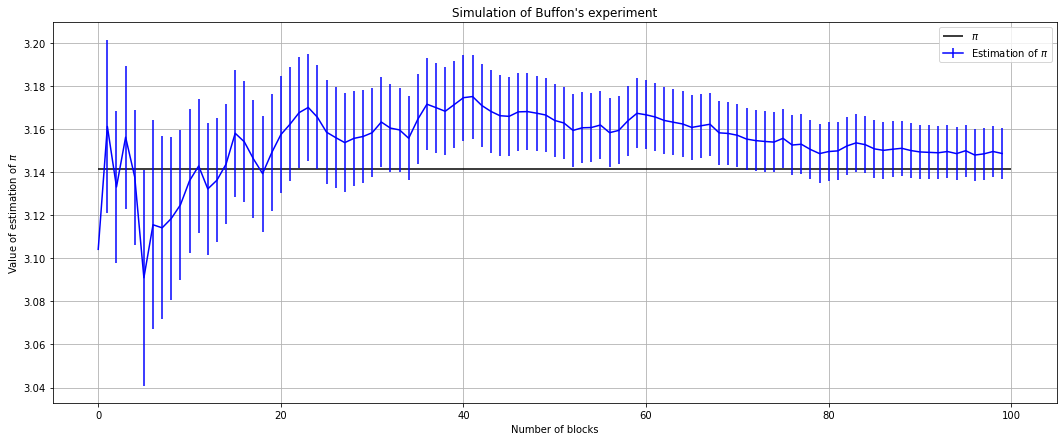

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 


x,y,err=np.loadtxt("pi.dat", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(18, 7))

plt.hlines(math.pi, 0, 100, color = 'black', label = '$\pi$')
plt.errorbar(x,y,yerr=err, color = 'blue', label = 'Estimation of $\pi$')
plt.xlabel('Number of blocks')
plt.ylabel('Value of estimation of $\pi$')
plt.title("Simulation of Buffon's experiment")
plt.grid(True)
plt.legend()
plt.show()